In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

## Reading the data, preprocessing the text and extracting synopsis column

In [2]:
df = pd.read_csv("ANNreviews.csv")
df.head()

,Name2,Review,Synopsis,Good_points,Ratings,Name,Bad_points
0,GN 7,"\r\n,\r\nA Silent Voice reached its climax at ...","At last, Shoya has woken up. Racing to the bri...",Maintains A Silent Voice's usual acuity of ar...,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}",A Silent Voice,"Feels a bit overlong in its resolutions, and ..."
1,DVD 1,"\r\n,\r\nTo fully and correctly appreciate 009...",In a world where the Cold War continues well p...,"Musical score, fan service.","{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...",009-1,"Some character designs are appallingly ugly, ..."
2,Sub.Blu-Ray,"\r\n,\r\nWhat happens when you take twenty-sev...",Haruto can't bring himself to accept that his ...,"Some great voice work and nice animation, tri...","{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...",A Town Where You Live,Story comes off melodramatic without much emo...
3,GN 6,"\r\n,\r\nIt's always an interesting experience...","Seeing Shoko about to leap off her balcony, Sh...",Doubles down on the manga's terrific characte...,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}",A Silent Voice,A couple dramatic points felt a little loosel...
4,GN 4,"\r\n,\r\nIt feels like A Silent Voice's densit...",Things continue to change little by little for...,Continues to demonstrate wondrously poignant ...,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}",A Silent Voice,Some dramatic developments here could have us...


In [3]:
from nltk import word_tokenize

def preprocess_text(text):
    if not pd.isnull(text):
        text = re.sub(r'\n|\t|\r', r' ', text, flags = re.DOTALL) #removing \n, \t and \r
        text = re.sub(r'[^a-zA-Z0-9_]', r' ', text) # removing . , ( ) [ ] etc.
        text = re.sub(r' +', r' ', text) #multiple spaces to one space
        text = text.lower()
        text = word_tokenize(text)   
    return text

In [4]:
# Preprocessing all text (except titles) form Anime News Network
columns = ["Synopsis", "Review" ,"Good_points", "Bad_points"]
df2 = df.copy()
for col in columns:
    df2[col] = df[col].map(preprocess_text)

In [5]:
df2.head()

,Name2,Review,Synopsis,Good_points,Ratings,Name,Bad_points
0,GN 7,"[a, silent, voice, reached, its, climax, at, t...","[at, last, shoya, has, woken, up, racing, to, ...","[maintains, a, silent, voice, s, usual, acuity...","{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}",A Silent Voice,"[feels, a, bit, overlong, in, its, resolutions..."
1,DVD 1,"[to, fully, and, correctly, appreciate, 009, 1...","[in, a, world, where, the, cold, war, continue...","[musical, score, fan, service]","{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...",009-1,"[some, character, designs, are, appallingly, u..."
2,Sub.Blu-Ray,"[what, happens, when, you, take, twenty, seven...","[haruto, can, t, bring, himself, to, accept, t...","[some, great, voice, work, and, nice, animatio...","{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...",A Town Where You Live,"[story, comes, off, melodramatic, without, muc..."
3,GN 6,"[it, s, always, an, interesting, experience, w...","[seeing, shoko, about, to, leap, off, her, bal...","[doubles, down, on, the, manga, s, terrific, c...","{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}",A Silent Voice,"[a, couple, dramatic, points, felt, a, little,..."
4,GN 4,"[it, feels, like, a, silent, voice, s, density...","[things, continue, to, change, little, by, lit...","[continues, to, demonstrate, wondrously, poign...","{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}",A Silent Voice,"[some, dramatic, developments, here, could, ha..."


In [6]:
synopsis = df2["Synopsis"].copy()

In [7]:
synopsis[:10]

0    [at, last, shoya, has, woken, up, racing, to, ...
1    [in, a, world, where, the, cold, war, continue...
2    [haruto, can, t, bring, himself, to, accept, t...
3    [seeing, shoko, about, to, leap, off, her, bal...
4    [things, continue, to, change, little, by, lit...
5    [it, s, a, few, years, in, the, future, when, ...
6    [six, short, stories, reveal, how, love, lette...
7    [summer, vacation, is, approaching, and, tomoh...
8    [six, years, ago, shoya, s, bullying, of, his,...
9    [years, ago, it, was, shoya, s, bullying, that...
Name: Synopsis, dtype: object

In [8]:
num_of_docs = len(synopsis)
num_of_docs

4174

## Counting occurrences

In [9]:
from collections import defaultdict

doc_count = defaultdict(int)

for syn in synopsis:
    updated = defaultdict(bool)
    for word in syn:
        if not updated[word]:
            doc_count[word] += 1
            updated[word] = True

In [10]:
doc_freq = {word: count/num_of_docs for word, count in doc_count.items()}

## Flitering out least common words

In [11]:
min_freq = 0.02
word_list = [word for word in doc_freq.keys() if doc_freq[word] > min_freq]
min_freq*num_of_docs, len(word_list)

(83.48, 652)

In [12]:
word_list

['themselves',
 'join',
 'called',
 'killed',
 'childhood',
 'break',
 'love',
 'dreams',
 'for',
 'company',
 'training',
 'second',
 'life',
 'wrong',
 'giant',
 'let',
 'skills',
 'various',
 'band',
 'creatures',
 'think',
 'race',
 'fate',
 'friends',
 'ever',
 'missing',
 'him',
 'person',
 'black',
 'city',
 'monster',
 'attempt',
 'named',
 'fellow',
 'out',
 'heroes',
 'seek',
 'powerful',
 'order',
 'side',
 'getting',
 'yet',
 'wants',
 'conflict',
 'stay',
 'men',
 'goes',
 'academy',
 'say',
 'does',
 'teacher',
 'when',
 'family',
 'elite',
 'dragon',
 'weapon',
 'will',
 'hero',
 'save',
 'was',
 'they',
 'path',
 'bring',
 'deal',
 'doesn',
 'high',
 'things',
 'tokyo',
 'hard',
 'works',
 'sister',
 'go',
 'though',
 'vampire',
 'she',
 'play',
 'end',
 'it',
 'back',
 'five',
 'anyone',
 'alien',
 'power',
 'secret',
 'village',
 'business',
 'chance',
 'well',
 'parents',
 'by',
 'personal',
 'won',
 'd',
 'history',
 'give',
 'stop',
 'the',
 'ultimate',
 'rescue',


In [13]:
filtered_synopsis = synopsis.map(lambda syn: [word for word in syn if word in word_list])

In [14]:
filtered_synopsis.head()

0    [at, last, has, up, to, the, where, he, and, t...
1    [in, a, world, where, the, war, continues, wel...
2    [can, t, bring, himself, to, that, his, with, ...
3    [about, to, off, her, to, her, her, before, sh...
4    [things, continue, to, change, little, by, lit...
Name: Synopsis, dtype: object

In [15]:
synopsis.map(len).describe()

count    4174.000000
mean      134.695256
std        54.961639
min         4.000000
25%        98.000000
50%       130.000000
75%       158.000000
max       422.000000
Name: Synopsis, dtype: float64

In [16]:
filtered_synopsis.map(len).describe()

count    4174.000000
mean       91.639195
std        37.505391
min         3.000000
25%        67.000000
50%        88.000000
75%       109.000000
max       290.000000
Name: Synopsis, dtype: float64

## Calculating frequencies

In [17]:
pair_doc_count = defaultdict(int)

for syn in filtered_synopsis:
    updated = defaultdict(bool)
    for w1 in syn:
        for w2 in syn:
            if w1 < w2 and not updated[(w1,w2)]:
                pair_doc_count[(w1,w2)] += 1
                updated[(w1,w2)]= True

In [19]:
pair_doc_freq = {pair: count/num_of_docs for pair, count in pair_doc_count.items()}

In [20]:
len(pair_doc_count), len(pair_doc_freq)

(209602, 209602)

In [21]:
pairs = list(pair_doc_count.keys())

In [22]:
df_words = pd.DataFrame()

df_words['A'] = pd.Series(w1 for w1, w2 in pairs)
df_words['B'] = pd.Series(w2 for w1, w2 in pairs)
df_words['P(A and B)/(P(A)*P(B))'] = pd.Series(pair_doc_freq[(w1,w2)]/(doc_freq[w1]*doc_freq[w2]) for w1, w2 in pairs)
df_words['P(A)'] = pd.Series(doc_freq[w1] for w1, w2 in pairs)
df_words['P(B)'] = pd.Series(doc_freq[w2] for w1, w2 in pairs)
df_words['P(A|B)'] = pd.Series(pair_doc_freq[(w1,w2)]/doc_freq[w2] for w1, w2 in pairs)
df_words['P(B|A)'] = pd.Series(pair_doc_freq[(w1,w2)]/doc_freq[w1] for w1, w2 in pairs)
df_words['P(A and B)'] = pd.Series(pair_doc_freq[(w1,w2)] for w1, w2 in pairs)

In [23]:
df_words.head(5)

,A,B,P(A and B)/(P(A)*P(B)),P(A),P(B),P(A|B),P(B|A),P(A and B)
0,itself,powers,0.914749,0.025874,0.080977,0.023669,0.074074,0.001917
1,much,true,1.163103,0.101342,0.063009,0.117871,0.073286,0.007427
2,different,happy,1.411661,0.042166,0.020125,0.059524,0.028409,0.001198
3,demon,trouble,0.677790,0.036655,0.038572,0.024845,0.026144,0.000958
4,live,of,1.021143,0.059655,0.936033,0.060916,0.955823,0.057020


In [25]:
df_words.sort_values(by = 'P(A and B)/(P(A)*P(B))', ascending= False)

,A,B,P(A and B)/(P(A)*P(B)),P(A),P(B),P(A|B),P(B|A),P(A and B)
4882,e,i,24.743274,0.024437,0.020604,0.604651,0.509804,0.012458
6478,short,stories,12.189900,0.033301,0.024197,0.405941,0.294964,0.009823
86677,giant,robot,9.798122,0.034020,0.026593,0.333333,0.260563,0.008864
139903,matters,worse,9.159937,0.021322,0.030666,0.195312,0.280899,0.005989
183227,crew,ship,8.348000,0.035937,0.023958,0.300000,0.200000,0.007187
3623,blood,vampire,8.313599,0.031145,0.026833,0.258929,0.223077,0.006948
23483,hero,heroes,7.996169,0.024437,0.020843,0.195402,0.166667,0.004073
65395,society,soul,7.612819,0.024197,0.027312,0.184211,0.207921,0.005031
190319,kingdom,princess,7.426699,0.027072,0.045280,0.201058,0.336283,0.009104
141890,break,summer,7.259972,0.023479,0.021083,0.170455,0.153061,0.003594


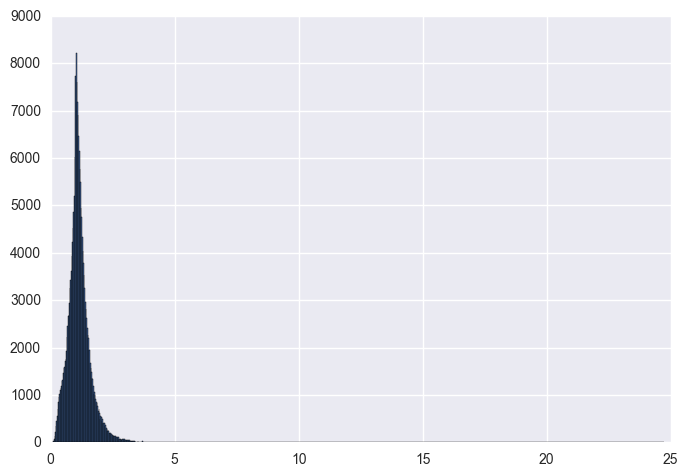

In [42]:
df_words['P(A and B)/(P(A)*P(B))'].hist(bins = 1000)

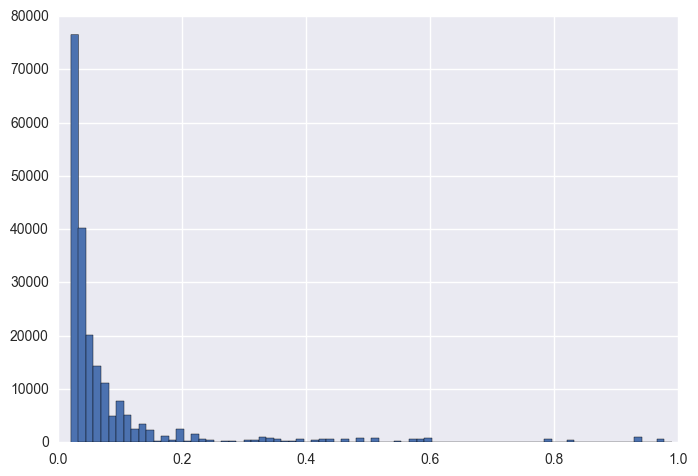

In [61]:
df_words['P(A)'].hist(bins = 80)

In [43]:
df_words.describe()

,P(A and B)/(P(A)*P(B)),P(A),P(B),P(A|B),P(B|A),P(A and B)
count,209602.000000,209602.000000,209602.000000,209602.000000,209602.000000,209602.000000
mean,1.145671,0.084997,0.086167,0.094504,0.095875,0.007921
std,0.459675,0.134385,0.133062,0.144279,0.142983,0.024612
min,0.078657,0.020125,0.020125,0.002899,0.002439,0.000240
25%,0.890042,0.027791,0.027552,0.029412,0.029412,0.001198
50%,1.091908,0.039770,0.040968,0.047059,0.048276,0.002396
75%,1.338874,0.075228,0.077623,0.088803,0.092566,0.005989
max,24.743274,0.989459,0.989459,1.000000,1.000000,0.962386


In [73]:
df_words[df_words['A'] == 'feelings'].sort_values(by = 'P(A and B)/(P(A)*P(B))', ascending= False)

,A,B,P(A and B)/(P(A)*P(B)),P(A),P(B),P(A|B),P(B|A),P(A and B)
111718,feelings,romantic,4.229589,0.037614,0.021083,0.159091,0.089172,0.003354
106210,feelings,relationship,3.288988,0.037614,0.046478,0.123711,0.152866,0.005750
68259,feelings,love,3.096829,0.037614,0.109008,0.116484,0.337580,0.012698
158504,feelings,heart,3.046311,0.037614,0.045999,0.114583,0.140127,0.005271
108451,feelings,summer,3.021135,0.037614,0.021083,0.113636,0.063694,0.002396
114306,feelings,returns,2.545467,0.037614,0.022520,0.095745,0.057325,0.002156
206364,feelings,situation,2.416908,0.037614,0.031624,0.090909,0.076433,0.002875
102955,feelings,visit,2.311825,0.037614,0.022041,0.086957,0.050955,0.001917
191446,feelings,sure,2.291895,0.037614,0.027791,0.086207,0.063694,0.002396
19014,feelings,interest,2.291895,0.037614,0.027791,0.086207,0.063694,0.002396


In [74]:
df_words[df_words['A'] == 'prince'].sort_values(by = 'P(A and B)/(P(A)*P(B))', ascending= False)

,A,B,P(A and B)/(P(A)*P(B)),P(A),P(B),P(A|B),P(B|A),P(A and B)
183348,prince,son,4.151857,0.024916,0.027791,0.103448,0.115385,0.002875
125984,prince,princess,3.822344,0.024916,0.045280,0.095238,0.173077,0.004312
1700,prince,sets,2.816464,0.024916,0.027312,0.070175,0.076923,0.001917
156059,prince,process,2.736451,0.024916,0.021083,0.068182,0.057692,0.001437
103990,prince,seek,2.271771,0.024916,0.025395,0.056604,0.057692,0.001437
160648,prince,story,2.267492,0.024916,0.042405,0.056497,0.096154,0.002396
90238,prince,wake,2.229701,0.024916,0.021562,0.055556,0.048077,0.001198
7941,prince,save,2.205199,0.024916,0.065405,0.054945,0.144231,0.003594
54047,prince,warriors,2.205199,0.024916,0.021802,0.054945,0.048077,0.001198
37988,prince,stay,2.157775,0.024916,0.022281,0.053763,0.048077,0.001198


In [44]:
edges = df_words.rename(columns = {'A': 'source', 'B': 'target', 'P(A and B)/(P(A)*P(B))': 'pRatio', 'P(A)': 'pA', 'P(B)': 'pB','P(A and B)': 'pAandB', 'P(A|B)': 'pAconditionalB', 'P(B|A)': 'pBconditionaA' })

In [45]:
edges.head(5)

,source,target,pRatio,pA,pB,pAconditionalB,pBconditionaA,pAandB
0,itself,powers,0.914749,0.025874,0.080977,0.023669,0.074074,0.001917
1,much,true,1.163103,0.101342,0.063009,0.117871,0.073286,0.007427
2,different,happy,1.411661,0.042166,0.020125,0.059524,0.028409,0.001198
3,demon,trouble,0.677790,0.036655,0.038572,0.024845,0.026144,0.000958
4,live,of,1.021143,0.059655,0.936033,0.060916,0.955823,0.057020


In [46]:
nodes = pd.DataFrame([(w, doc_freq[w]) for w in word_list], columns = ["word", "freq"])

In [47]:
edges.to_csv("edges.csv", encoding = 'utf-8', index = False)

In [48]:
nodes.to_csv("nodes.csv", encoding = 'utf-8', index = False)

In [49]:
df_temp = pd.read_csv("edges.csv")

In [50]:
df_temp.head(5)

,source,target,pRatio,pA,pB,pAconditionalB,pBconditionaA,pAandB
0,itself,powers,0.914749,0.025874,0.080977,0.023669,0.074074,0.001917
1,much,true,1.163103,0.101342,0.063009,0.117871,0.073286,0.007427
2,different,happy,1.411661,0.042166,0.020125,0.059524,0.028409,0.001198
3,demon,trouble,0.677790,0.036655,0.038572,0.024845,0.026144,0.000958
4,live,of,1.021143,0.059655,0.936033,0.060916,0.955823,0.057020


In [51]:
df_temp = pd.read_csv("nodes.csv")

In [52]:
df_temp.head(5)

,word,freq
0,themselves,0.067322
1,join,0.034978
2,called,0.075946
3,killed,0.020843
4,childhood,0.048395
